## 1 benchmarks for numerical estimates

In [2]:
# Import Python Packages
import numpy as np
import math 
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# given mean and covariance
d = 4
mean_1 = np.array([1, 3, 5, 7])
cov_1 = np.array(
    [
        [1, 0, 0, 0],
        [0, 2.25, 0, 0],
        [0, 0, 4, 0],
        [0, 0, 0, 6.25],
    ],
)

# range of alpha
a_range=np.vstack(np.linspace(0,1,20,endpoint=False)[1:])

In [4]:
# model function
def func1(args):
    result = np.sum(args, axis=1)
    return result

In [5]:
# sobol indices
S_i = []
for i in range(d):
    S_i_i = cov_1[i,i]/np.trace(cov_1)
    S_i.append(S_i_i)

S_i = np.hstack(S_i)
S_i = np.tile(S_i, (len(a_range),1))
                       
print(S_i)

[[0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]]


In [6]:
# inverse error function
def inv_error(a):
    phi_inv = norm.ppf(a)
    return phi_inv


phi_inv = inv_error(a_range)

In [7]:
# q_2: PDF of the out put Y(Eq.30)
q_2 = []
for a in range(len(a_range)):
    q_2_a = []
    for i in range(d):
        q_2_i = cov_1[i,i] + phi_inv[a]**2*(math.sqrt(np.trace(cov_1))-math.sqrt(sum(cov_1[j,j] for j in range(d) if j != i)))**2
        q_2_a.append(q_2_i)
    q_2.append(q_2_a)
    
q_2 = np.vstack(q_2).reshape((len(a_range),d))
print(q_2)

[[1.05204894 2.52727738 4.94828404 8.85717277]
 [1.03159581 2.4183186  4.5756468  7.83265943]
 [1.02066523 2.3600887  4.37650151 7.28513761]
 [1.0136267  2.32259276 4.24826603 6.93257231]
 [1.00875202 2.29662412 4.15945371 6.68839542]
 [1.00529034 2.27818293 4.09638515 6.51499734]
 [1.00285628 2.26521613 4.0520389  6.39307358]
 [1.00123478 2.25657797 4.02249654 6.31185107]
 [1.00030378 2.25161832 4.00553461 6.26521664]
 [1.         2.25       4.         6.25      ]
 [1.00030378 2.25161832 4.00553461 6.26521664]
 [1.00123478 2.25657797 4.02249654 6.31185107]
 [1.00285628 2.26521613 4.0520389  6.39307358]
 [1.00529034 2.27818293 4.09638515 6.51499734]
 [1.00875202 2.29662412 4.15945371 6.68839542]
 [1.0136267  2.32259276 4.24826603 6.93257231]
 [1.02066523 2.3600887  4.37650151 7.28513761]
 [1.03159581 2.4183186  4.5756468  7.83265943]
 [1.05204894 2.52727738 4.94828404 8.85717277]]


In [8]:
# Q_2: quantile based sensitivit measure 2.(Eq.14)
Q_2 = []
for a in range(len(a_range)):
    Q_2_a = []
    for i in range(d):
        Q_2_i = q_2[a,i]/sum(q_2[a])
        Q_2_a.append(Q_2_i)
    Q_2.append(Q_2_a)

Q_2 = np.hstack(Q_2).reshape((len(a_range),d))
print(Q_2)

[[0.06051551 0.14537296 0.28463306 0.50947847]
 [0.06505117 0.15249621 0.28853469 0.49391792]
 [0.06785258 0.15689583 0.2909445  0.48430709]
 [0.06982315 0.1599906  0.2926396  0.47754665]
 [0.07127365 0.1622686  0.29388734 0.47257041]
 [0.07234982 0.16395873 0.29481307 0.46887837]
 [0.07313081 0.16518527 0.29548489 0.46619904]
 [0.07366267 0.16602055 0.2959424  0.46437438]
 [0.07397234 0.16650689 0.29620878 0.46331199]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07397234 0.16650689 0.29620878 0.46331199]
 [0.07366267 0.16602055 0.2959424  0.46437438]
 [0.07313081 0.16518527 0.29548489 0.46619904]
 [0.07234982 0.16395873 0.29481307 0.46887837]
 [0.07127365 0.1622686  0.29388734 0.47257041]
 [0.06982315 0.1599906  0.2926396  0.47754665]
 [0.06785258 0.15689583 0.2909445  0.48430709]
 [0.06505117 0.15249621 0.28853469 0.49391792]
 [0.06051551 0.14537296 0.28463306 0.50947847]]


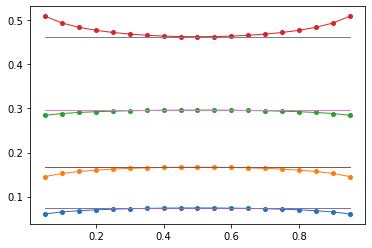

In [9]:
ax = plt.subplot(111)

# plot sobol indice
ax.plot(a_range,Q_2, marker='o', markersize=4, linewidth=1)

# plot Q_2
ax.plot(a_range,S_i, linewidth=1)

## 2 Monte Carlo estimator

### 2.1 Generate samples for x

In [10]:
# The number of samples
N = 100

# Generate sample for x given mean and covariance
x_j = np.random.multivariate_normal(mean_1,cov_1,N) # shape:(N, d)
x_j = np.sort(x_j) # shape:(100, 4)

In [ ]:
# conditional sample x




### 2.2 Get output Y by using function and sample x

In [11]:
Y_j=func1(x_j)
Y_j

array([13.57545456, 19.16214128, 12.27455049, 11.43723547, 22.52408125,
       11.88976868, 13.00883021, 11.61441518, 16.04170477, 18.60703035,
       14.30938418, 22.15244934, 21.70068667, 15.32307362, 19.52127744,
       14.22148597, 13.73370987, 17.32507777, 13.500002  , 16.86956225,
       18.73210765, 18.21416933,  9.36664679, 19.67864262, 20.807478  ,
       15.34495738, 10.12314779, 16.09969944, 14.5720227 ,  8.74398883,
       11.13603114, 15.59491944, 15.31134833, 19.38420811, 13.46023832,
       21.10108417, 19.49899722, 15.40162988, 14.72747682, 16.014937  ,
       17.79097715, 16.87668179, 16.1511971 , 12.30138617, 15.12321696,
       17.22335502, 14.77094073, 20.54962223, 14.9811047 , 19.19480445,
       17.71918481, 10.99454439, 15.00521094, 14.49361295, 18.40770628,
        8.48103583, 17.77697616, 20.83629834, 18.39328509, 16.16641277,
       10.39868723, 21.79212286, 17.13159826, 18.4527688 , 10.48402051,
       20.16864243, 13.51541698, 17.39218502, 13.50613133, 13.46

### 2.3 CDF as a function of y

#### Way 1: Define a function ecdf

In [14]:
def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

x, y = ecdf(Y_j)

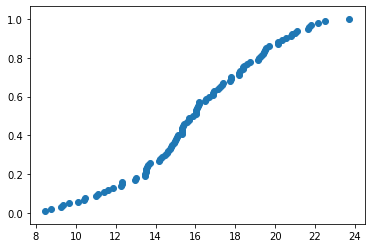

In [15]:
ecdf(Y_j)
plt.scatter(x=x, y=y)

#### Way 2: Use ECDF function from statsmodels package.

In [16]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(Y_j)

In [17]:
ecdf(20)

0.86

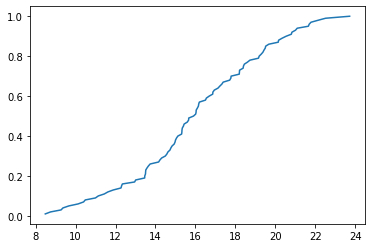

In [18]:
plt.plot(ecdf.x, ecdf.y)

### 2.4 Inverse CDF

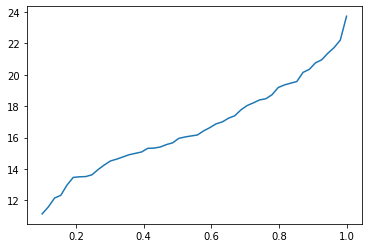

97.5 percentile: 21.972286096654447


In [20]:
from scipy.interpolate import interp1d

slope_changes = sorted(set(Y_j))

Y_edf_values_at_slope_changes = [ ecdf(item) for item in slope_changes]
inverted_edf = interp1d(Y_edf_values_at_slope_changes, slope_changes)

x = np.linspace(0.1, 1)
y = inverted_edf(x)
plt.plot(x, y)
plt.show()

print ('97.5 percentile:', inverted_edf(0.975))

### 2.5 Get measures